**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame({'price': boston.target})

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()

In [6]:
train_data = pd.concat([X_train, y_train], axis=1)

In [7]:
train_data_scaled = scaler.fit_transform(train_data)

In [8]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [9]:
train_data_tsne = tsne.fit_transform(train_data_scaled)

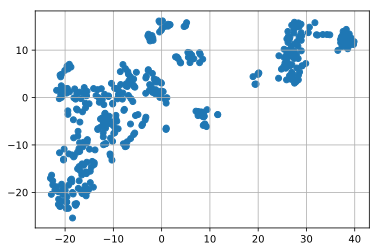

In [10]:
plt.scatter(train_data_tsne[:, 0], train_data_tsne[:, 1])
plt.grid(True)
plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [13]:
train_labels = kmeans.fit_predict(X_train)

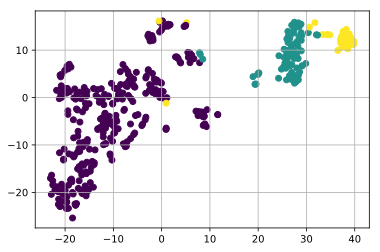

In [14]:
plt.scatter(train_data_tsne[:, 0], train_data_tsne[:, 1], c=train_labels)
plt.grid(True)
plt.show()

In [15]:
train_data['labels'] = train_labels

train_data[['price', 'CRIM', 'labels']].groupby('labels').mean()

,price,CRIM
labels,,
0,25.168687,0.404863
1,17.442105,11.745662
2,13.196774,14.360380


*** Задание 3**

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [16]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data_scaled = scaler.transform(test_data)
test_labels = kmeans.predict(X_test)

In [17]:
test_data['labels'] = test_labels

test_data[['price', 'CRIM', 'labels']].groupby('labels').mean()

,price,CRIM
labels,,
0,23.911594,0.246421
1,17.392308,8.469302
2,12.814286,19.021666
